# Fundamentos de Ciencias de Datos
# Trabajo Práctico 1
## Integrantes:
- Florencia Fernández
- Leandro Salvañá

# Ejercicio 1
El propósito de este ejercicio es llevar a cabo un análisis exploratorio de un conjunto de datos que
contiene información demográfica y económica de las provincias de Argentina
(provincias_datos_2022.xlsx). Este análisis tiene como objetivo realizar una exploración de las
variables e identificar características relevantes o asociaciones que permitan obtener conocimientos
relevantes para la toma de decisiones informadas en diversos ámbitos, como el económico, social y
político.


In [6]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# imports necesarios para obtener herramientas de análisis
import pandas as pd
import re
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pyarrow as pa
import pyarrow.parquet as pq

In [8]:
# Lectura del archivo provicias_datos_2022.csv y obtención del dataframe
provincias_datos_2022_df = pd.read_csv('provincias_datos_2022.csv', delimiter=';', header = 3)
provincias_datos_2022_df

,PROVINCIa,población (miles),hogares (miles),ingresos laborales (miles pesos),tasa de empleo (%),superficie (km2),exportaciones (mill usd)
0,Ciudad Autónoma de Buenos Aires,3.004,1.263,211.877.384,"4,7","205,9","311,163"
1,Buenos Aires,17.292,5.738,623.250.917,"8,7","305.907,40","33024,657"
2,Catamarca,336.000,102.000,8.460.986,"7,3","101.486,10","201,03"
3,Chaco,3.477,1.251,122.790.341,"6,5","99.763,30","516,336"
4,Chubut,967.000,287.000,24.733.558,"5,3","224.302,30","2575,372"
5,Córdoba,1.044,321.000,22.744.468,"2,6","164.707,80","12851,979"
6,Corrientes,591.000,205.000,30.606.036,"3,6","89.123,30","273,185"
7,Entre Ríos,1.252,431.000,40.510.249,"6,4","78.383,70","1911,902"
8,Formosa,509.000,148.000,9.586.123,"3,3","75.488,30","40,614"
9,Jujuy,696.000,197.000,17.044.750,"5,1","53.244,20","873,44"


---
## 1 - Realizar las tareas de limpieza, transformación y normalización de los datos contenidos en el archivo "provincias_datos_2022.xlsx" a fin de asegurar la calidad y homogeneidad de la información.

---
### 1.1 - Observaciones de los datos en crudo en el df

In [9]:
# Información del tipo de dato y cantidad de valores por columna
provincias_datos_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PROVINCIa                         24 non-null     object 
 1   población (miles)                 23 non-null     float64
 2   hogares (miles)                   24 non-null     float64
 3   ingresos laborales (miles pesos)  23 non-null     object 
 4   tasa de empleo (%)                24 non-null     object 
 5   superficie (km2)                  24 non-null     object 
 6   exportaciones (mill usd)          24 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.4+ KB


Se observa que existen 7 columnas y 24 filas en el dataframe.
De ésas columnas, 6 tienen un dtype que no es adecuado para lo que buscan representar. Todos los object, menos el de provincia deberían ser algún tipo de dato numérico. Y los de tipo float deberían ser de tipo entero.
Se tienen 2 valores nulos en el dataframe.

In [10]:
# Información cuantitativa del dataframe
provincias_datos_2022_df.describe()

,población (miles),hogares (miles)
count,23.000000,24.000000
mean,308.076565,199.144458
std,318.134570,145.642683
min,1.003000,1.215000
25%,2.336000,106.500000
50%,317.000000,199.500000
75%,601.500000,295.500000
max,967.000000,535.000000


El describe en esta instancia sirve como un resumen general y permite observar que faltan las medidas de 4 columnas que representan datos numéricos, pero hasta el momento tratados como object, por lo que se pierden los cálculos de medidas de centralidad, posición y dispersión para las mismas. Además, los datos aún no se encuentran manipulados para su limpieza y normalización por lo que los valores iniciales en el describe podrían diferir luego de éste proceso.

De las inspecciones surge que:
- El tipo de dato en 4 de las 7 columnas (ingresos laborales, tasa de empleo, superficie, exportaciones) no es numérico y sería adecuado que lo fuera en base a lo que representan
- El tipo de dato en población (miles) y hogares (miles) debería ser de tipo entero ya que representan variables discretas

- Las columnas poblacion (miles) y hogares (miles) las carga con tipo de dato float, debido a que interpreta el punto como separador decimal. Esto hace que le agregue tres ceros a los valores del csv que eran enteros. Por ejemplo, en el csv, Catamarca tiene 336 en la columna población (miles), pero al leerlo desde pandas le agrega los tres ceros y queda como 336.000. Esto hay que tratarlo porque aunque interprete el punto como separador decimal, en realidad en el csv se usó como separador de miles. Por lo que esos tres ceros que agrega estarían modificando la cantidad real de población informada para el año 2022.

- La columna tasa de empleo debería tener el nombre tasa de desempleo, ya que si se observan sus valores, corresponden a porcentajes muy bajos para referisrse al empleo

- La columna tasa de empleo contiene un porcentaje mayor a 100 en una de sus filas

- La columna tasa de empleo tiene un dato guardado con un punto que se entiende quiere representar la separación entera de la decimal. Se asume, ya que todas las demás separaciones decimales del resto de los datos se realizaron con una coma, que ése punto se debió a un error de tipeo y que efectivamente debió ser una coma

- Solo se encuentran 2 datos NaN para imputar en el dataframe. Uno en la columna poblacion y otro en la columna ingresos laborales

- Los nombres de las provincias están correctamente escritos. Es una observación realizada sobre todo para el momento de graficar e interpretar los datos correspondientes a las mismas y no dar lugar a confusiones

- El valor de superficie (km2) para la provincia de Tucumán es el más elevado de todos. Es decir que es la provincia con mayor extensión de todas. Conociendo el mapa del país se puede notar que este es un dato erróneo. Se buscará contrastarlo con el obtenido de un sitio oficial.

---
### 1.2 - Limpiar y normalizar el dataframe


El objetivo en esta sección es proponer y efectuar un manejo de datos faltantes y erróneos, limpieza y homogenización de datos en el dataframe

---
#### 1.2.1 - Acondicionamiento del header

- Eliminación, en los nombres de las columnas, de posibles espacios al inicio y final (whitespaces) que puedan dificultar el acceso a las mismas en el futuro debido al desconocimiento de la existencia de los mismos

In [11]:
provincias_datos_2022_df.columns = provincias_datos_2022_df.columns.str.strip() # al inicio y al final

- Cambio de nombre en la columna 'tasa de empleo' a 'tasa de desempleo'

In [12]:
provincias_datos_2022_df.rename(columns = {'tasa de empleo (%)':'tasa de desempleo (%)'}, inplace = True)

- Cambio a minúsculas el nombre de la columna PROVINCIa \
La capitalización no tiene impacto en el análisis, sin embargo, el formato se vuelve uniforme para todas las columnas y facilita la lectura

In [13]:
provincias_datos_2022_df.rename(columns = {'PROVINCIa':'provincia'}, inplace = True)

- Eliminación de acentuaciones en los nombres de las columnas


Para que los valores de los datos sean compatibles tanto con un encoding que reconoce símbolos de acentuación en las palabras como para uno que no, se establece un header con valores sin ningún acento.

Esto busca asegurar la correcta lectura en un futuro, sin caer en la posibilidad de incompatibilidades que no permitan mostrar los valores del set de datos.

In [14]:
provincias_datos_2022_df.rename(columns = {'población (miles)':'poblacion (miles)'}, inplace = True)

- Como buena práctica, se reemplazan los espacios en el header por guiones bajos

In [15]:
provincias_datos_2022_df.columns = provincias_datos_2022_df.columns.str.replace(' ', '_')

In [16]:
provincias_datos_2022_df.head()

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(miles_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_usd)
0,Ciudad Autónoma de Buenos Aires,3.004,1.263,211.877.384,"4,7","205,9","311,163"
1,Buenos Aires,17.292,5.738,623.250.917,"8,7","305.907,40","33024,657"
2,Catamarca,336.000,102.000,8.460.986,"7,3","101.486,10","201,03"
3,Chaco,3.477,1.251,122.790.341,"6,5","99.763,30","516,336"
4,Chubut,967.000,287.000,24.733.558,"5,3","224.302,30","2575,372"


---
### 1.2.2 - Acondicionamiento y unificación del criterio de separación decimal en columnas con valores numéricos.
En el set de datos recibido se usa el punto como separador de miles y la coma como separador decimal

Los datos se acondicionarán para aplicar lo siguiente:

Separador decimal: representado con el punto \
Separador de miles: sin el punto, queda el string vacío

Se elige el punto como separador decimal, ya que la librería pandas también lo considera así. Al contrario de la coma que la cuenta como un caracter más. De esta forma, sise quisiese pasar de un string con coma a float, daría un error. Aspecto que no ocurre al convertir un string con punto, que sí lo interpreta como float. \

Adicionalmente, al ser el punto el separador decimal, éste ya no puede ser el separador de miles. Por lo que para ello se utilizará el string vacío en lugar del punto.

- Reemplazo de coma por punto en la columna tasa de desempleo (%). De esta manera, unificamos el criterio de separación decimal utilizando el punto \


Si el valor ya se encontraba con un punto como separador decimal, continuará así. Si era una coma, como se observa en la gran mayoría, se cambiará a punto.

Los que no tengan ninguno de ésos símbolos, se considera que no fueron cargados con parte decimal, mientras no superen el 100%.

Los valores que superen el 100% serán tratados más adelante.

In [17]:
provincias_datos_2022_df['tasa_de_desempleo_(%)'] = provincias_datos_2022_df['tasa_de_desempleo_(%)'].str.replace(',','.')

- Reemplazo de punto por string vacío en las columnas 'población (miles)',	'hogares (miles)' e 'ingresos laborales (miles pesos)'

Previo a realizar el reemplazo, verificamos que luego de la aparición de un punto existan 3 dígitos y no menos de tres. Ya que el punto representa separación de miles.

Utilizamos una función para evaluar la columna para asegurarnos de que contemplamos todos los datos existentes en la misma.

En el presente dataframe se tienen 24 filas y esta observación se puede realizar manualmente, con la lectura directa de cada una de ellas. Sin embargo, aún así,podríamos llegar a pasar por alto un dato cargado de manera errónea.

Además, en éste caso son 24 filas, pero podríamos tener un dataframe con miles. Hacer una lectura manual una a una y corroborar datos erróneos de ésa manera sería muy difícil y aumentaría las posibilidades de equivocaciones.

Por ello recurrimos al uso de funciones con expresiones regulares.

In [18]:
# Lista para almacenar los valores con menos de tres dígitos a la derecha del punto
valores_erroneos = []

In [19]:
# Función para evaluar el formato de los valores con dtype object
def evaluar_formato_en_dtype_object(valor):
    # Verificar si el valor es NaN
    if pd.isna(valor):
         return np.nan
    # Verificar si el valor tiene menos de tres dígitos a la derecha del punto
    match = re.search(r'\.\d{1,2}$', valor)
    
    if match:
        # Añadir el valor a la lista de valores incorrectos
        valores_erroneos.append(valor)

    return valor

Como se hizo mención anteriormente, en las columnas población (miles) y hogares (miles) se añaden tres ceros luego del punto a valores que en los datos originales no los poseían, alterando así el número real del dato obtenido para el año 2022.

Por ello, se procede a evaluar si todos los dígitos luego del punto son cero (es decir, añadidos por pandas) y, de ser así, se eliminan. De esta forma, se tiene nuevamente el valor real del dato presente en el csv.

Si hay algún valor distinto de cero a la derecha del punto, quiere decir que corresponden a datos que se encontraban cargados así originalmente. Por lo tanto, permanecerán igual.

In [20]:
# Función para evaluar si los tres dígitos después del punto son ceros y eliminarlos
def evaluar_ceros(valor):
    # Verificar si el valor es NaN
    if pd.isna(valor):
         return np.nan
         
    # Convertir el valor a cadena
    valor_str = str(valor)
    
    # Verificar si los tres dígitos después del punto son ceros
    if '.' in valor_str:
        partes = valor_str.split('.')
        decimal = partes[1]
        
        if decimal == '0': # se evalua si hay un solo cero porque si luego del punto eran todos ceros inicialmente, al convertirlo a str solo dejará un único cero
            # Eliminar los ceros después del punto
            valor_str = partes[0]
 
    return valor_str

In [21]:
# Aplicar la función a la columna 'población (miles)'
provincias_datos_2022_df['poblacion_(miles)'] = provincias_datos_2022_df['poblacion_(miles)'].apply(evaluar_ceros)

In [22]:
# Aplicar la función a la columna 'hogares (miles)'
provincias_datos_2022_df['hogares_(miles)'] = provincias_datos_2022_df['hogares_(miles)'].apply(evaluar_ceros)

In [23]:
# Aplicar la función que evalúa el formato a la columna 'población (miles)'
provincias_datos_2022_df['poblacion_(miles)'].apply(evaluar_formato_en_dtype_object)

# Imprimir la lista de valores incorrectos
print(valores_erroneos)

[]


In [24]:
# Resetear lista
valores_erroneos = []

In [25]:
# Aplicar la función que evalúa el formato a la columna 'hogares (miles)'
provincias_datos_2022_df['hogares_(miles)'] = provincias_datos_2022_df['hogares_(miles)'].apply(evaluar_formato_en_dtype_object)

# Imprimir la lista de valores incorrectos
print(valores_erroneos)

[]


In [26]:
# Resetear lista
valores_erroneos = []

In [27]:
# Aplicar la función que evalúa el formato a la columna 'ingresos laborales (miles pesos)'
provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'].apply(evaluar_formato_en_dtype_object)

# Imprimir la lista de valores incorrectos
print(valores_erroneos)

[]


Se observa que no hay valores que tengan menos de 3 ceros a la derecha del punto en las columnas evaluadas. Se procede entonces a reemplazar el punto por string vacío.

In [28]:
# Columna población
provincias_datos_2022_df['poblacion_(miles)'] = provincias_datos_2022_df['poblacion_(miles)'].str.replace('.','')

# Columna hogares
provincias_datos_2022_df['hogares_(miles)'] = provincias_datos_2022_df['hogares_(miles)'].str.replace('.','')

# Columna ingresos laborales
provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'] = provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'].str.replace('.','')

<ipython-input-28-2a24aa224a0d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  provincias_datos_2022_df['poblacion_(miles)'] = provincias_datos_2022_df['poblacion_(miles)'].str.replace('.','')
<ipython-input-28-2a24aa224a0d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  provincias_datos_2022_df['hogares_(miles)'] = provincias_datos_2022_df['hogares_(miles)'].str.replace('.','')
<ipython-input-28-2a24aa224a0d>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'

- Reemplazo de la coma por punto como separador decimal y de los puntos por string vacío en la columna 'superficie (km2)'

In [29]:
provincias_datos_2022_df['superficie_(km2)'] = provincias_datos_2022_df['superficie_(km2)'].str.replace('.','')
provincias_datos_2022_df['superficie_(km2)'] = provincias_datos_2022_df['superficie_(km2)'].str.replace(',','.')

<ipython-input-29-d071df331259>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  provincias_datos_2022_df['superficie_(km2)'] = provincias_datos_2022_df['superficie_(km2)'].str.replace('.','')


- Reemplazo de la coma por punto en la columna exportaciones (mill usd)

In [30]:
provincias_datos_2022_df['exportaciones_(mill_usd)'] = provincias_datos_2022_df['exportaciones_(mill_usd)'].str.replace(',','.')

- Reemplazo de vocales acentuadas por las respectivas pero sin acentuar en la columna provincia

Al igual que en el header, para que los valores de los datos sean compatibles tanto con un encoding que reconoce símbolos de acentuación en las palabras como para uno que no, se establecen los nombres de las provincias sin ningún acento.

Esto busca asegurar la correcta lectura en un futuro, sin caer en la posibilidad de incompatibilidades que no permitan mostrar los valores del set de datos.

In [31]:
# Función para eliminar los acentos de una palabra
def eliminar_acentos(palabra):
    # Diccionario de reemplazos de vocales acentuadas
    reemplazos = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U'
    }
    # Realizar el reemplazo de vocales acentuadas
    palabra_sin_acentos = re.sub(r'[áéíóúÁÉÍÓÚ]', lambda x: reemplazos[x.group()], palabra)
    return palabra_sin_acentos

# Aplicar la función eliminar_acentos a la columna 'provincia'
provincias_datos_2022_df['provincia'] = provincias_datos_2022_df['provincia'].apply(eliminar_acentos)

In [32]:
provincias_datos_2022_df

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(miles_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_usd)
0,Ciudad Autonoma de Buenos Aires,3004,1263,211877384,4.7,205.9,311.163
1,Buenos Aires,17292,5738,623250917,8.7,305907.40,33024.657
2,Catamarca,336,102,8460986,7.3,101486.10,201.03
3,Chaco,3477,1251,122790341,6.5,99763.30,516.336
4,Chubut,967,287,24733558,5.3,224302.30,2575.372
5,Cordoba,1044,321,22744468,2.6,164707.80,12851.979
6,Corrientes,591,205,30606036,3.6,89123.30,273.185
7,Entre Rios,1252,431,40510249,6.4,78383.70,1911.902
8,Formosa,509,148,9586123,3.3,75488.30,40.614
9,Jujuy,696,197,17044750,5.1,53244.20,873.44


---
### 1.2.3 - Adecuación del tipo de dato en las columnas del dataframe

Comprobamos que no existan valores negativos en las columnas.

In [33]:
# Reemplazar los valores NaN por una cadena vacía para que no de error cuando intenta evaluar el dato de tipo object y encuentra un NaN. Se busca evaluar las filas donde sí existe un dato cargado
provincias_datos_2022_df['poblacion_(miles)'] = provincias_datos_2022_df['poblacion_(miles)'].fillna('')

# Crear una lista para almacenar posibles valores negativos
valores_negativos = provincias_datos_2022_df[provincias_datos_2022_df['poblacion_(miles)'].str.startswith('-')]['poblacion_(miles)'].tolist()

# Restaurar los valores NaN
provincias_datos_2022_df['poblacion_(miles)'] = provincias_datos_2022_df['poblacion_(miles)'].replace('', np.nan)

# Imprimir la lista de valores negativos
print(valores_negativos)

[]


In [34]:
# Reemplazar los valores NaN por una cadena vacía para que no de error cuando intenta evaluar el dato de tipo object y encuentra un NaN. Se busca evaluar las filas donde sí existe un dato cargado
provincias_datos_2022_df['hogares_(miles)'] = provincias_datos_2022_df['hogares_(miles)'].fillna('')

# Crear una lista para almacenar posibles valores negativos
valores_negativos = provincias_datos_2022_df[provincias_datos_2022_df['hogares_(miles)'].str.startswith('-')]['hogares_(miles)'].tolist()

# Restaurar los valores NaN
provincias_datos_2022_df['hogares_(miles)'] = provincias_datos_2022_df['hogares_(miles)'].replace('', np.nan)

# Imprimir la lista de valores negativos
print(valores_negativos)

[]


In [35]:
# Reemplazar los valores NaN por una cadena vacía para que no de error cuando intenta evaluar el dato de tipo object y encuentra un NaN. Se busca evaluar las filas donde sí existe un dato cargado
provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'] = provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'].fillna('')

# Crear una lista para almacenar posibles valores negativos
valores_negativos = provincias_datos_2022_df[provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'].str.startswith('-')]['ingresos_laborales_(miles_pesos)'].tolist()

# Restaurar los valores NaN
provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'] = provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'].replace('', np.nan)

# Imprimir la lista de valores negativos
print(valores_negativos)

[]


In [36]:
# Reemplazar los valores NaN por una cadena vacía para que no de error cuando intenta evaluar el dato de tipo object y encuentra un NaN. Se busca evaluar las filas donde sí existe un dato cargado
provincias_datos_2022_df['tasa_de_desempleo_(%)'] = provincias_datos_2022_df['tasa_de_desempleo_(%)'].fillna('')

# Crear una lista para almacenar posibles valores negativos
valores_negativos = provincias_datos_2022_df[provincias_datos_2022_df['tasa_de_desempleo_(%)'].str.startswith('-')]['tasa_de_desempleo_(%)'].tolist()

# Restaurar los valores NaN
provincias_datos_2022_df['tasa_de_desempleo_(%)'] = provincias_datos_2022_df['tasa_de_desempleo_(%)'].replace('', np.nan)

# Imprimir la lista de valores negativos
print(valores_negativos)

[]


In [37]:
# Reemplazar los valores NaN por una cadena vacía para que no de error cuando intenta evaluar el dato de tipo object y encuentra un NaN. Se busca evaluar las filas donde sí existe un dato cargado
provincias_datos_2022_df['superficie_(km2)'] = provincias_datos_2022_df['superficie_(km2)'].fillna('')

# Crear una lista para almacenar posibles valores negativos
valores_negativos = provincias_datos_2022_df[provincias_datos_2022_df['superficie_(km2)'].str.startswith('-')]['superficie_(km2)'].tolist()

# Restaurar los valores NaN
provincias_datos_2022_df['superficie_(km2)'] = provincias_datos_2022_df['superficie_(km2)'].replace('', np.nan)

# Imprimir la lista de valores negativos
print(valores_negativos)

[]


In [38]:
# Reemplazar los valores NaN por una cadena vacía para que no de error cuando intenta evaluar el dato de tipo object y encuentra un NaN. Se busca evaluar las filas donde sí existe un dato cargado
provincias_datos_2022_df['exportaciones_(mill_usd)'] = provincias_datos_2022_df['exportaciones_(mill_usd)'].fillna('')

# Crear una lista para almacenar posibles valores negativos
valores_negativos = provincias_datos_2022_df[provincias_datos_2022_df['exportaciones_(mill_usd)'].str.startswith('-')]['exportaciones_(mill_usd)'].tolist()

# Restaurar los valores NaN
provincias_datos_2022_df['exportaciones_(mill_usd)'] = provincias_datos_2022_df['exportaciones_(mill_usd)'].replace('', np.nan)

# Imprimir la lista de valores negativos
print(valores_negativos)

[]


No se registran valores negativos en las columnas evaluadas.
No deberían existir valores negativos en población (miles), hogares (miles), tasa de desempleo (%) y superficie (km2)puesto que dichas variables se representan con números positivos.
Si se hubiesern hallado, se tendría que analizar el motivo. Considerar que fue un error de tipeo sería una posibilidad. Otra sería reemplazar por NaN los valores negativos y fijar un criterio para imputarlos.

En este caso no se ha encontrado ningún valor negativo y, por lo tanto, se continuará con la conversión de tipo de dato de las columnas como se había previsto.

- Cambios de tipo de dato en las columnas tasa de desempleo (%), superficie (km2), ingresos laborales (miles pesos) y exportaciones (mill usd) a valor numérico con decimal

In [39]:
# tasa de desempleo (%)
provincias_datos_2022_df['tasa_de_desempleo_(%)'] = provincias_datos_2022_df['tasa_de_desempleo_(%)'].astype('float64')

# superficie (km2)
provincias_datos_2022_df['superficie_(km2)'] = provincias_datos_2022_df['superficie_(km2)'].astype('float64')

# exportaciones (mill usd)
provincias_datos_2022_df['exportaciones_(mill_usd)'] = provincias_datos_2022_df['exportaciones_(mill_usd)'].astype('float64')

# ingresos laborales (miles pesos)
provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'] = provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'].astype('float64')

- Cambio de tipo de dato en las columnas población (miles) y hogares (miles) a entero

In [40]:
# población (miles)
# Reemplazar NaN por un valor temporal
temp_value = "-1" #como hemos controlado que no existen valores negativos, tenemos la seguridad de que éste valor no se encontrará en conflicto
# con los ya existentes para sustituir temporalmente al NaN por el mismo hasta que tome un valor definitivo cuando se impute
provincias_datos_2022_df['poblacion_(miles)'] = provincias_datos_2022_df['poblacion_(miles)'].fillna(temp_value)

# Convertir a tipo entero
provincias_datos_2022_df['poblacion_(miles)'] = provincias_datos_2022_df['poblacion_(miles)'].astype('int64')


# hogares (miles)
# Reemplazar NaN por un valor temporal
provincias_datos_2022_df['hogares_(miles)'] = provincias_datos_2022_df['hogares_(miles)'].fillna(temp_value)

# Convertir a tipo entero
provincias_datos_2022_df['hogares_(miles)'] = provincias_datos_2022_df['hogares_(miles)'].astype('int64')

---
### 1.2.4 - Acondicionamiento de las columnas que representan valores monetarios a la misma escala y moneda

Seguramente más adelante interese comparar y buscar relación entre las columnas ingresos laborales y exportaciones. Tener los valores en la misma escala, hará que la conversión de una moneda a otra sea más directa.

In [41]:
provincias_datos_2022_df['ingresos_laborales_(miles_pesos)'] = provincias_datos_2022_df['ingresos_laborales_(miles_pesos)']/1000

In [42]:
provincias_datos_2022_df.rename(columns = {'ingresos_laborales_(miles_pesos)':'ingresos_laborales_(mill_pesos)'}, inplace = True)

- Cambio de la moneda utilizada en la columna exportaciones a pesos

Como los datos fueron registrados para el año 2022 pero no se sabe en qué mes, se buscaron los valores promedio del dólar para cada mes el 2022.

Se utilizará la mediana de ésa lista de valores para convertir los dólares de las exportaciones a pesos y trabajar así con las columnas que representan valores monetarios en la misma moneda.

Se obtuvieron los datos de la página oficial del Banco Central de la República Argentina

Fuente de los datos del dólar para el año 2022: https://www.bcra.gob.ar/PublicacionesEstadisticas/Evolucion_moneda.asp

In [43]:
dolar_2022_df = pd.read_excel('dolar_2022.xlsx')
dolar_2022_df

,fecha,valor_(pesos)
0,2022-01-31,105.02
1,2022-02-25,107.45
2,2022-03-30,110.89
3,2022-04-29,115.31
4,2022-05-30,120.01
5,2022-06-30,125.23
6,2022-07-29,131.27
7,2022-08-30,138.60
8,2022-09-30,147.32
9,2022-10-31,156.91


In [44]:
mediana_dolar_2022 = dolar_2022_df['valor_(pesos)'].median()
print('mediana dolar 2022: ', mediana_dolar_2022)

mediana dolar 2022:  128.25


In [45]:
provincias_datos_2022_df['exportaciones_(mill_usd)'] = provincias_datos_2022_df['exportaciones_(mill_usd)']*mediana_dolar_2022

In [46]:
provincias_datos_2022_df.rename(columns = {'exportaciones_(mill_usd)':'exportaciones_(mill_pesos)'}, inplace = True)

In [47]:
print('Observación de las columnas luego del tratamiento')
print('\n')
provincias_datos_2022_df

Observación de las columnas luego del tratamiento




,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
0,Ciudad Autonoma de Buenos Aires,3004,1263,211877.384,4.7,205.9,3.990665e+04
1,Buenos Aires,17292,5738,623250.917,8.7,305907.4,4.235412e+06
2,Catamarca,336,102,8460.986,7.3,101486.1,2.578210e+04
3,Chaco,3477,1251,122790.341,6.5,99763.3,6.622009e+04
4,Chubut,967,287,24733.558,5.3,224302.3,3.302915e+05
5,Cordoba,1044,321,22744.468,2.6,164707.8,1.648266e+06
6,Corrientes,591,205,30606.036,3.6,89123.3,3.503598e+04
7,Entre Rios,1252,431,40510.249,6.4,78383.7,2.452014e+05
8,Formosa,509,148,9586.123,3.3,75488.3,5.208745e+03
9,Jujuy,696,197,17044.750,5.1,53244.2,1.120187e+05


In [48]:
print('Observación de los tipos de datos de las columnas luego del tratamiento')
print('\n')
provincias_datos_2022_df.info()

Observación de los tipos de datos de las columnas luego del tratamiento


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   provincia                        24 non-null     object 
 1   poblacion_(miles)                24 non-null     int64  
 2   hogares_(miles)                  24 non-null     int64  
 3   ingresos_laborales_(mill_pesos)  23 non-null     float64
 4   tasa_de_desempleo_(%)            24 non-null     float64
 5   superficie_(km2)                 24 non-null     float64
 6   exportaciones_(mill_pesos)       24 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.4+ KB


---
### 1.3 - Imputación de datos

---
#### 1.3.1 - Columna tasa de desempleo (%)

In [49]:
provincias_datos_2022_df[provincias_datos_2022_df['tasa_de_desempleo_(%)'] > 100.0]

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
23,Tierra del Fuego,172,60,12059.449,110.0,22592.1,49115.3895


Se observa que existe un valor dentro de la columna tasa de desempleo (%) que supera el 100%

In [50]:
print('tasa de desempleo(%)')
print('mediana: ', provincias_datos_2022_df[(provincias_datos_2022_df['tasa_de_desempleo_(%)'] != -1) & (provincias_datos_2022_df['provincia'] != 'Tierra del Fuego')]['tasa_de_desempleo_(%)'].median())
print('media: ', provincias_datos_2022_df[(provincias_datos_2022_df['tasa_de_desempleo_(%)'] != -1) & (provincias_datos_2022_df['provincia'] != 'Tierra del Fuego')]['tasa_de_desempleo_(%)'].mean())
print('desviación estándar: ', provincias_datos_2022_df[(provincias_datos_2022_df['tasa_de_desempleo_(%)'] != -1) & (provincias_datos_2022_df['provincia'] != 'Tierra del Fuego')]['tasa_de_desempleo_(%)'].std())

tasa de desempleo(%)
mediana:  5.1
media:  5.069565217391304
desviación estándar:  1.7319024701200425


Considerando que la media y la mediana son prácticamente iguales y que la desviación estándar con respecto a la media es baja se observa que la distribución de los valores de la tasa de desempleo tiende a ser simétrica o aproximadamente simétrica. Esto indica que no hay valores atípicos o extremos que afecten significativamente la media.

Por ello, se utilizará el valor de la media en la columna tasa de desempleo para imputar el valor faltante en la provincia de Tierra del Fuego.

In [51]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Tierra del Fuego', 'tasa_de_desempleo_(%)'] = round(provincias_datos_2022_df[(provincias_datos_2022_df['tasa_de_desempleo_(%)'] != -1) & (provincias_datos_2022_df['provincia'] != 'Tierra del Fuego')]['tasa_de_desempleo_(%)'].mean(),1)

In [52]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Tierra del Fuego']

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
23,Tierra del Fuego,172,60,12059.449,5.1,22592.1,49115.3895


---
#### 1.3.2 - Columna población (miles)

In [53]:
provincias_datos_2022_df[(provincias_datos_2022_df['poblacion_(miles)'] == -1)]

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
18,San Luis,-1,148,14056.915,1.7,75347.1,112775.868


Se encuentra que existe un valor dentro de la columna población (miles) que posee el valor -1. Del tratamiento realizado anteriormente se sabe que el valor -1 representa un NaN.


In [54]:
print('poblacion (miles)')
print('mediana: ', provincias_datos_2022_df[provincias_datos_2022_df['poblacion_(miles)'] != -1]['poblacion_(miles)'].median())
print('media: ', provincias_datos_2022_df[provincias_datos_2022_df['poblacion_(miles)'] != -1]['poblacion_(miles)'].mean())
print('desviación estándar: ', provincias_datos_2022_df[provincias_datos_2022_df['poblacion_(miles)'] != -1]['poblacion_(miles)'].std())

poblacion (miles)
mediana:  730.0
media:  1817.9130434782608
desviación estándar:  3500.7175097405325


Se observa una media muy alejada de la mediana y además la desviación estándar es muy elevada.

Esta condición indica una asimetría positiva en la distribución de los datos con valores extremos que están alejando la media hacia arriba. Este tipo de situación puede requerir un análisis más cuidadoso, ya que los valores extremos pueden tener un impacto significativo en las conclusiones estadísticas.

Por ello, no sería lo más adecuado utilizar la media de la población para imputar el dato faltante en el dataframe como se ha hecho con la tasa de desempleo.

Se filtrarán las provincias que tienen hogares, ingresos laborales y superficie similares a San Luis utilizando ciertos criterios de similitud (máximo valor permitido). Luego se calculará el promedio de la población en esas provincias similares y se actualizará el valor de la población de San Luis con el promedio calculado.

Este enfoque permite utilizar información de otras variables para imputar el valor de la población basándose en la similitud con otras provincias. 

Se utilizan criterios de similitud en cantidad de hogares, ingresos laborales y superficie para identificar provincias geográfica, poblacional y productivamente con niveles similares a Tierra del Fuego.

Se elijen estas columnas porque son variables que tienen relevancia en la cantidad de población presente en una provincia. Si la superficie es mayor, se esperará mayor cantidad de habitantes. Solo usar esta variable no es suficiendte puesto que hay casos, como la Ciudad Autónoma de Buenos Aires, donde la superficie es pequeña y la cantidad de habitantes es elevada en relación con otras provincias. Entonces, se introducen más variables. La cantidad de hogares nos aporta información sobre la cantidad de población. Así también, la cantidad de ingresos. Si no existe tanta población los ingresos serán menores, según se observa en el dataframe. 

In [55]:
# Identificar la provincia objetivo 'San Luis'
hogares_objetivo = provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'San Luis', 'hogares_(miles)'].values[0]
ingresos_objetivo = provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'San Luis', 'ingresos_laborales_(mill_pesos)'].values[0]
superficie_objetivo = provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'San Luis', 'superficie_(km2)'].values[0]

print('hogares San Luis: ', hogares_objetivo)
print('ingresos San Luis: ', ingresos_objetivo)
print('superficie San Luis: ', superficie_objetivo)

hogares San Luis:  148
ingresos San Luis:  14056.915
superficie San Luis:  75347.1


In [56]:
print('hogares (miles)')
print('mediana: ', provincias_datos_2022_df[provincias_datos_2022_df['hogares_(miles)'] != -1]['hogares_(miles)'].median())
print('media: ', provincias_datos_2022_df[provincias_datos_2022_df['hogares_(miles)'] != -1]['hogares_(miles)'].mean())
print('desviación estándar: ', provincias_datos_2022_df[provincias_datos_2022_df['hogares_(miles)'] != -1]['hogares_(miles)'].std())
print('\n')

print('ingresos laborales (mill pesos)')
print('mediana: ', provincias_datos_2022_df[provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'] != -1]['ingresos_laborales_(mill_pesos)'].median())
print('media: ', provincias_datos_2022_df[provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'] != -1]['ingresos_laborales_(mill_pesos)'].mean())
print('desviación estándar: ', provincias_datos_2022_df[provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'] != -1]['ingresos_laborales_(mill_pesos)'].std())
print('\n')

print('superficie (km2)')
print('mediana: ', provincias_datos_2022_df[provincias_datos_2022_df['superficie_(km2)'] != -1]['superficie_(km2)'].median())
print('media: ', provincias_datos_2022_df[provincias_datos_2022_df['superficie_(km2)'] != -1]['superficie_(km2)'].mean())
print('desviación estándar: ', provincias_datos_2022_df[provincias_datos_2022_df['superficie_(km2)'] != -1]['superficie_(km2)'].std())

hogares (miles)
mediana:  236.5
media:  593.2083333333334
desviación estándar:  1152.5995186370324


ingresos laborales (mill pesos)
mediana:  24733.558
media:  66556.20713043478
desviación estándar:  130989.82408610733


superficie (km2)
mediana:  100624.70000000001
media:  152904.62083333332
desviación estándar:  176649.0383083853


Considerando:
Variabilidad de los datos y tamaño de la muestra se elije la mediana como máxima permitida para los valores de las provincias restantes necesarias para imputar el dato.
Si los valores tuvieran una baja variabilidad, sería más viable establecer un máximo más estricto, mucho más cercano a los valores de San Luis, en lugar de una amplitud como la considerada. Por el contrario, los valores tienen una alta variabilidad, por lo que se establece una máxima más amplia.

Además, Argentina posee un total de 23 provincias más la Capital lo que lleva al set de datos a tener pocas filas. Así, se otorga cierta flexibilidad en los criterios de similitud para garantizar que se obtengan suficientes observaciones representativas para comparar.

Al tomar la mediana como referencia, se obtiene un valor central no afectado por el desvío y, al encontrarse ésta alejada de la media (siendo la media mucho más elevada), no se considerarían valores tan disimiles o extremadamente alejados a los pertenecientes a San Luis, sino el 50% por debajo de la mediana, dentro de los cuales también se encuentra dicha provincia.

In [57]:
# Máxima permitida en hogares
hogares = provincias_datos_2022_df[provincias_datos_2022_df['hogares_(miles)'] != -1]['hogares_(miles)'].median()

# Máxima permitida en ingresos laborales
ingresos = int(provincias_datos_2022_df[provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'] != -1]['ingresos_laborales_(mill_pesos)'].median())

# Máxima permitida en superficie
superficie = provincias_datos_2022_df[provincias_datos_2022_df['superficie_(km2)'] != -1]['superficie_(km2)'].median()

In [58]:
# Filtrar el dataframe para obtener las provincias similares
provincias_similares = provincias_datos_2022_df[(provincias_datos_2022_df['hogares_(miles)'] <= hogares) & (provincias_datos_2022_df['superficie_(km2)'] <= superficie) & (provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'] <= ingresos) & (provincias_datos_2022_df['provincia'] != 'San Luis') & (provincias_datos_2022_df['hogares_(miles)'] != -1) & (provincias_datos_2022_df['superficie_(km2)'] != -1.0) & (provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'] != -1)]

print(provincias_similares)

           provincia  poblacion_(miles)  hogares_(miles)  \
8            Formosa                509              148   
9              Jujuy                696              197   
11          La Rioja                356              108   
17          San Juan                699              202   
23  Tierra del Fuego                172               60   

    ingresos_laborales_(mill_pesos)  tasa_de_desempleo_(%)  superficie_(km2)  \
8                          9586.123                    3.3           75488.3   
9                         17044.750                    5.1           53244.2   
11                         8646.574                    4.5           91493.7   
17                        23036.779                    3.1           88296.2   
23                        12059.449                    5.1           22592.1   

    exportaciones_(mill_pesos)  
8                   5208.74550  
9                 112018.68000  
11                 23955.30450  
17                149146.1

In [59]:
promedio_poblacion_similares = int(round(provincias_similares['poblacion_(miles)'].mean(),0))
promedio_poblacion_similares

486

In [60]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'San Luis', 'poblacion_(miles)'] = promedio_poblacion_similares

In [61]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'San Luis']

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
18,San Luis,486,148,14056.915,1.7,75347.1,112775.868


---
#### 1.3.3 - Columna ingresos laborales (miles pesos)

In [62]:
provincias_datos_2022_df[provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'].isna()]

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
15,Rio Negro,687,260,NaN,6.0,202168.6,59002.4385


Se encuentra que existe un valor dentro de la columna ingresos laborales (mill pesos) que es NaN.

In [63]:
print('ingresos laborales (miles pesos)')
print('mediana: ', provincias_datos_2022_df[provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'] != -1]['ingresos_laborales_(mill_pesos)'].median())
print('media: ', provincias_datos_2022_df[provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'] != -1]['ingresos_laborales_(mill_pesos)'].mean())
print('desviación estándar: ', provincias_datos_2022_df[provincias_datos_2022_df['ingresos_laborales_(mill_pesos)'] != -1]['ingresos_laborales_(mill_pesos)'].std())

ingresos laborales (miles pesos)
mediana:  24733.558
media:  66556.20713043478
desviación estándar:  130989.82408610733


Al igual que en el caso anterior se observa una media muy alejada de la mediana y además la desviación estándar es muy elevada. Esta condición indica una asimetría positiva en la distribución de los datos con valores extremos que están alejando la media hacia arriba. Este tipo de situación puede requerir un análisis más cuidadoso, ya que los valores extremos pueden tener un impacto significativo en las conclusiones estadísticas.

Por ello, no sería lo más adecuado utilizar la media de los ingresos laborales para imputar el dato faltante en el dataframe como se ha hecho con la tasa de desempleo.

Se filtrarán las provincias que tienen tasa de desempleo y exportaciones similares a Rio Negro utilizando ciertos criterios de similitud (máximo valor permitido). Luego se calculará el promedio de los ingresos laborales (miles pesos) en esas provincias similares y se actualizará el valor de los ingresos laborales de San Luis con el promedio calculado.

Este enfoque permite utilizar información de otras variables para imputar el valor de los ingresos laborales basándose en la similitud con otras provincias. 

Se eligen las columnas tasa de desempleo y exportaciones porque junto a ingresos laborales representan variables ecónomicas que se inluencian las unas con otras y se conectan.

Cuando la tasa de desempleo es alta, es decir, hay una mayor proporción de personas desempleadas, esto suele estar asociado con una menor demanda de mano de obra y, en consecuencia, con una disminución de los ingresos laborales totales. Por otro lado, cuando la tasa de desempleo es baja, la escasez de trabajadores puede generar una mayor demanda de empleados, lo que puede llevar a un aumento en los salarios y, por ende, en los ingresos laborales de la región.

El nivel de exportaciones también influye en el ingreso laboral de una región. Las exportaciones representan una fuente de demanda externa para los productos y servicios de una región. Cuando las exportaciones aumentan, las empresas locales tienden a experimentar un crecimiento en sus ventas y, a su vez, pueden aumentar su producción. Esto puede generar una mayor demanda de trabajadores y, potencialmente, un aumento en los salarios y en el ingreso laboral de la región. Por el contrario, una disminución en las exportaciones puede tener efectos negativos en el ingreso laboral, ya que las empresas pueden reducir su producción y, en consecuencia, la demanda de empleo disminuye.



In [64]:
# Identificar la provincia objetivo 'Rio Negro'
desempleo_objetivo = provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Rio Negro', 'tasa_de_desempleo_(%)'].values[0]
exportaciones_objetivo = provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Rio Negro', 'exportaciones_(mill_pesos)'].values[0]

print('hogares Rio Negro: ', desempleo_objetivo)
print('exportaciones Rio Negro: ', exportaciones_objetivo)

hogares Rio Negro:  6.0
exportaciones Rio Negro:  59002.4385


In [65]:
print('tasa de desempleo (%)')
print('mediana: ', provincias_datos_2022_df[provincias_datos_2022_df['tasa_de_desempleo_(%)'] != -1]['tasa_de_desempleo_(%)'].median())
print('media: ', provincias_datos_2022_df[provincias_datos_2022_df['tasa_de_desempleo_(%)'] != -1]['tasa_de_desempleo_(%)'].mean())
print('desviación estándar: ', provincias_datos_2022_df[provincias_datos_2022_df['tasa_de_desempleo_(%)'] != -1]['tasa_de_desempleo_(%)'].std())
print('\n')

print('exportaciones (mill usd)')
print('mediana: ', provincias_datos_2022_df[provincias_datos_2022_df['exportaciones_(mill_pesos)'] != -1]['exportaciones_(mill_pesos)'].median())
print('media: ', provincias_datos_2022_df[provincias_datos_2022_df['exportaciones_(mill_pesos)'] != -1]['exportaciones_(mill_pesos)'].mean())
print('desviación estándar: ', provincias_datos_2022_df[provincias_datos_2022_df['exportaciones_(mill_pesos)'] != -1]['exportaciones_(mill_pesos)'].std())
print('\n')

tasa de desempleo (%)
mediana:  5.1
media:  5.070833333333333
desviación estándar:  1.6938454235379858


exportaciones (mill usd)
mediana:  135730.053
media:  465120.66796875
desviación estándar:  980437.0132718976




Se utiliza el mismo criterio aplicado a la evaluación de los valores de media, mediana y desvío estándar para el caso anterior (la imputación de la población para la provincia de San Luis)

La tasa de desempleo tiene una media y una mediana prácticamente iguales y un desvío que no llega al 50%. Aquí es indistinto considerar la media o la mediana.

Pero en el caso de las exportaciones esto no sucede y, por lo explicado en el punto anterior (imputación de dato faltante para San Luis), se considerará a la mediana como medida de referencia.

In [66]:
# Máxima permitida en tasa de desempleo
tasa_desempleo = provincias_datos_2022_df[provincias_datos_2022_df['tasa_de_desempleo_(%)'] != -1]['tasa_de_desempleo_(%)'].median()

# Máxima permitida en exportaciones
exportaciones = provincias_datos_2022_df[provincias_datos_2022_df['exportaciones_(mill_pesos)'] != -1]['exportaciones_(mill_pesos)'].median()

In [67]:
# Filtrar el dataframe para obtener las provincias similares
provincias_similares = provincias_datos_2022_df[(provincias_datos_2022_df['tasa_de_desempleo_(%)'] <= tasa_desempleo) & (provincias_datos_2022_df['exportaciones_(mill_pesos)'] <= exportaciones) & (provincias_datos_2022_df['provincia'] != 'Rio Negro')]

print(provincias_similares)

                          provincia  poblacion_(miles)  hogares_(miles)  \
0   Ciudad Autonoma de Buenos Aires               3004             1263   
6                        Corrientes                591              205   
8                           Formosa                509              148   
9                             Jujuy                696              197   
11                         La Rioja                356              108   
13                         Misiones               1003              342   
18                         San Luis                486              148   
23                 Tierra del Fuego                172               60   

    ingresos_laborales_(mill_pesos)  tasa_de_desempleo_(%)  superficie_(km2)  \
0                        211877.384                    4.7             205.9   
6                         30606.036                    3.6           89123.3   
8                          9586.123                    3.3           75488.3   
9   

In [68]:
promedio_ingresos_similares = round(provincias_similares['ingresos_laborales_(mill_pesos)'].mean(), 3)
promedio_ingresos_similares

41689.542

In [69]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Rio Negro', 'ingresos_laborales_(mill_pesos)'] = promedio_ingresos_similares

In [70]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Rio Negro']

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
15,Rio Negro,687,260,41689.542,6.0,202168.6,59002.4385


---
#### 1.3.4 - Columna superficie (km2)

Cómo se señaló al inicio, la provincia Tucumán tiene un valor de superficie excesivamente elevado con respecto a otras provincias. Por conocimiento del mapa de Argentina se sabe que este dato es erróneo.

In [71]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Tucuman']

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
22,Tucuman,1403,403,34757.143,6.3,910324.4,122313.94875


Entendiendo que el valor de la extensión de territorio de cada provincia es un dato que no varía en el tiempo, se acude a un sitio oficial que posea estas mediciones y se reemplaza el valor por el presente en dicha fuente.

Se obtiene el valor del Instituto Geográfico Nacional

Fuentes: https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/DivisionPolitica
https://www.ign.gob.ar/descargas/geoespacial/Informe_supercies_de_Argentina.pdf (pág 26)

In [72]:
superficies_provincias_df = pd.read_excel('superficies_provincias.xlsx')

In [73]:
superficies_provincias_df.rename(columns = {'superficie_(km2)':'superficie_ign_(km2)'}, inplace = True)

In [74]:
superficie_tucuman_ign = superficies_provincias_df[superficies_provincias_df['provincia'] == 'Tucuman']['superficie_ign_(km2)']
superficie_tucuman_ign

22    22592.1
Name: superficie_ign_(km2), dtype: float64

In [75]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Tucuman', 'superficie_(km2)'] = superficie_tucuman_ign

In [76]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Tucuman']

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
22,Tucuman,1403,403,34757.143,6.3,22592.1,122313.94875


Considerando que las provincias en el dataframe principal y en el dataframe superficies_provincias_df coinciden fila a fila, se compararán los valores presentes en cada uno para conocer si son cercanos y saber si se requiere reemplazar algún otro dato para la superficie.

In [77]:
aux_df = superficies_provincias_df.merge(provincias_datos_2022_df, on='provincia')

In [78]:
aux_df[['provincia', 'superficie_(km2)', 'superficie_ign_(km2)']]

,provincia,superficie_(km2),superficie_ign_(km2)
0,Ciudad Autonoma de Buenos Aires,205.9,205.9
1,Buenos Aires,305907.4,305907.4
2,Catamarca,101486.1,101486.1
3,Chaco,99763.3,99763.3
4,Chubut,224302.3,224302.3
5,Cordoba,164707.8,164707.8
6,Corrientes,89123.3,89123.3
7,Entre Rios,78383.7,78383.7
8,Formosa,75488.3,75488.3
9,Jujuy,53244.2,53244.2


Se observa que todos los valores coinciden exactamente, excepto por el de Tierra del Fuego. Aunque la diferencia no es elevada, se procederá a reemplazarlo por el del sitio oficial para unificar las mediciones con el resto.

In [79]:
superficie_tierra_del_fuego_ign = superficies_provincias_df[superficies_provincias_df['provincia'] == 'Tierra del Fuego']['superficie_ign_(km2)']

In [80]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Tierra del Fuego', 'superficie_(km2)'] = superficie_tierra_del_fuego_ign

In [81]:
provincias_datos_2022_df.loc[provincias_datos_2022_df['provincia'] == 'Tierra del Fuego']

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
23,Tierra del Fuego,172,60,12059.449,5.1,20698.3,49115.3895


---
## 2. Una vez que los datos hayan sido curados, proceder a explorar cada variable y las posibles relaciones entre las variables del conjunto de datos, tales como la población, la cantidad de hogares, los ingresos laborales, la tasa de empleo y la superficie en km2. Para ello, se deben emplear técnicas de visualización y estadística descriptiva.

## 3. Al concluir el análisis, se espera que el estudiante presente sus hallazgos y conclusiones, destacando cualquier patrón o tendencia que resulte relevante y contribuya a una mayor comprensión de las relaciones entre las variables estudiadas.



Descripción de las columnas del dataframe:
- provincia: Indica el nombre de cada una de las provincias de Argentina y la capital del país. Es un tipo de dato object puesto que sus valores se encuentran formados por caracteres.

- población (miles): Indica la cantidad total de población, representada en miles, para cada valor de provincia. Es un tipo de dato int puesto que se completa con valores numéricos enteros al ser una variable discreta.

- hogares (miles): Indica la cantidad total de hogares, representados en miles, para cada valor de provincia. Es un tipo de dato int puesto que se completa con valores numéricos enteros al ser una variable discreta.

- ingresos laborales (mill pesos): Indica la cantidad total de ingresos, representados en millones y en la moneda del país (pesos), para cada valor de provincia. Es un tipo de dato float puesto que se completa con valores numéricos que presentan decimales.

- tasa de desempleo (%): Indica el porcentaje de desempleo para cada valor de provincia en el dataframe. Es un tipo de dato float puesto que se completa con valores numéricos que presentan decimales.

- superficie (km2): Indica el área o extención del terreno, representado en km2, que corresponde a cada valor de provincia en el dataframe. Es un tipo de dato float puesto que se completa con valores numéricos que presentan decimales.

- exportaciones (mill pesos): Indica la cantidad total de exportaciones, representada en millones y en la moneda del país (pesos), para cada valor de provincia en el dataframe.  Es un tipo de dato float puesto que se completa con valores numéricos que presentan decimales.

Todos los presentes valores de cada columna descrita son correspondientes al año 2022.

---
### 2-3.1 - Cálculo de medidas estadísticas

El cálculo de medidas de centralidad y dispersión permitirá comprender mejor el comportamiento de los datos

In [82]:
header = provincias_datos_2022_df.columns.to_list()
header.remove('provincia')
header.remove('superficie_(km2)')

In [83]:
medidas_estadisticas_provincias_2022_df = pd.DataFrame({
    'variable':[],
    'media':[],
    'desviacion_estandar':[],
    'mediana': [],
})

In [84]:
for column in header:
  variable = column
  media = round(provincias_datos_2022_df[column].mean(), 2)
  desviacion_estandar = round(provincias_datos_2022_df[column].std(), 2)
  mediana = round(provincias_datos_2022_df[column].median(), 2)
  
  # Nueva fila a insertar
  nueva_fila = pd.DataFrame({
      'variable':[column],
      'media':[media],
      'desviacion_estandar':[desviacion_estandar],
      'mediana': [mediana],
      })

  # Insertar la nueva fila al principio del DataFrame
  medidas_estadisticas_provincias_2022_df = pd.concat([nueva_fila, medidas_estadisticas_provincias_2022_df], ignore_index=True)

In [85]:
medidas_estadisticas_provincias_2022_df

,variable,media,desviacion_estandar,mediana
0,exportaciones_(mill_pesos),465120.67,980437.01,135730.05
1,tasa_de_desempleo_(%),5.07,1.69,5.10
2,ingresos_laborales_(mill_pesos),65520.10,128211.09,26653.55
3,hogares_(miles),593.21,1152.60,236.50
4,poblacion_(miles),1762.42,3434.55,714.50


Se observa alta variabilidad en las mediciones de los datos de las variables presentadas, excepto en la columna tasa de desempleo donde se encuentra una media prácticamente igual a la mediana y una desviación estándar baja. Al ser ambas medidas similares y tener una desviación estandar baja, indica que no hay valores extremadamente altos o bajos que puedan sesgar significativamente la media.

A saber: no se evaluan las anteriores medidas para la varibale superficie ya que la misma es un valor fijo para cada provincia que ha sido establecido para tener una división política del territorio nacional y no varía en el tiempo. Esto hace que observar separadamente la distribución de la misma no aporte valor al análisis puesto que sus mediciones no se encuentran influenciadas por otras variables ni dependen del momento en el que fue medida.

Aún así, se tendrá en cuenta más adelante para analizarla en conjunto con las demás variables.

---
### 2-3.2 - Visualización de los datos en gráficos

Para tener un mayor entendimiento visual de los datos, se utilizarán diversas visualizaciones gráficas.

---
#### 2-3.2.1 - Gráfico de caja y bigotes (boxplot): se busca observar la distribución y los valores extremos en una variable numérica, como la tasa de desempleo o los ingresos laborales.

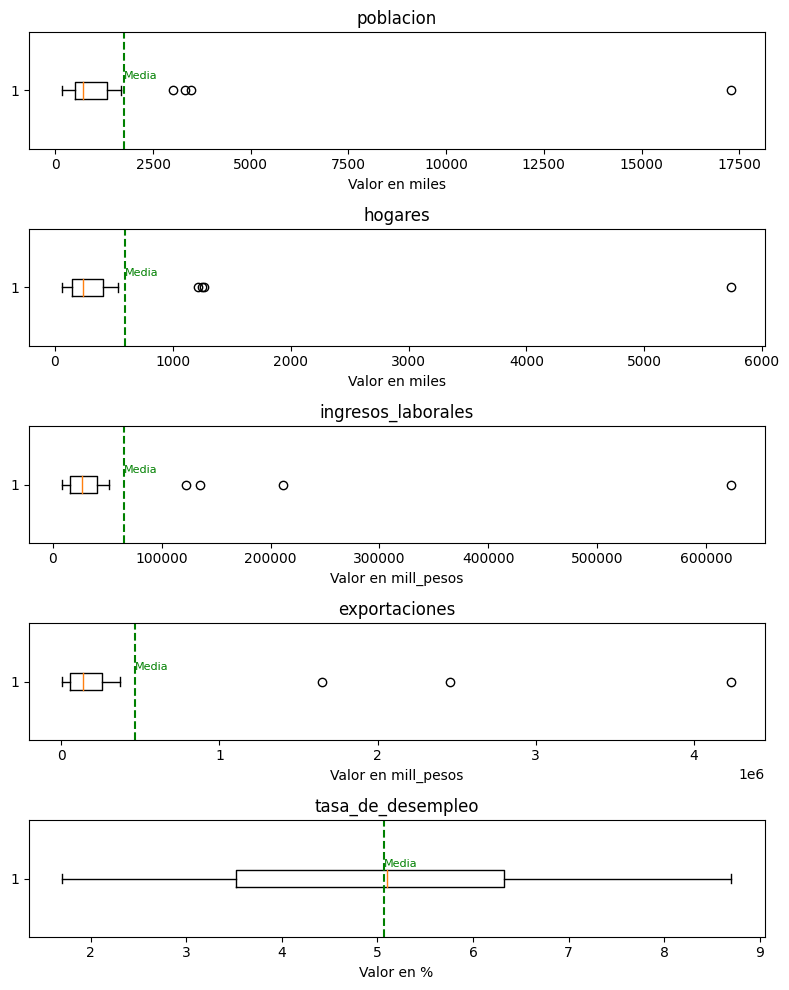

In [86]:
# Lista de columnas numéricas a graficar
columns_to_plot = ['poblacion_(miles)', 'hogares_(miles)', 'ingresos_laborales_(mill_pesos)', 'exportaciones_(mill_pesos)', 'tasa_de_desempleo_(%)']

# Graficar boxplot para cada columna
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 10))

for i, column in enumerate(columns_to_plot):
    start = column.find('(') + 1
    end = column.find(')')
    ax = axes[i]
    ax.boxplot(provincias_datos_2022_df[column], vert=False)
    ax.axvline(provincias_datos_2022_df[column].mean(), color='green', linestyle='--')  # Agregar línea media
    ax.text(provincias_datos_2022_df[column].mean(), 1.1, 'Media', color='green', fontsize=8, ha='left')
    ax.set_title(column[:start-2])
    ax.set_xlabel('Valor en '+ column[start:end])

plt.tight_layout()
plt.show()

Observaciones:

Los diagramas de cajas nos permiten visualizar y enfatizar lo que se ha venido observando a lo largo del trabajo.

La variables población, hogares, ingresos laborales y exportaciones poseen una distribución asimétrica positiva. Debido a la presencia de valores extremos en la derecha, la media se ve influenciada y se desplaza hacia los valores más altos.

En dichas variables, la mayoría de las provincias se concentran en la parte izquierda de la distribución, mientras que hay pocos valores extremos a la derecha.

Eso indica que en general las provincias no poseen valores tan elevados en mediciones de población, cantidad de hogares, ingresos laborales y exportaciones siendo solo algunas de ellas las que cuentan con altos niveles de las mismas y las que influencian para elevar la media.

Se entiende mirando los gráficos que las cantidades de población, hogares, ingresos laborales y exportaciones en el país se encuentran en gran parte representadas por unas pocas provincias. Posiblemente sean las provincias con mayor nivel de producción en el territorio nacional.

---
#### 2-3.2.2 - Gráfico de barras: para visualizar la población, el número de hogares, los ingresos laborales y las exportaciones para cada provincia. Esto permitirá comparar fácilmente las magnitudes de estas variables entre las diferentes provincias.

#### Gráfico de tortas: El gráfico de torta es útil para mostrar la composición relativa de un conjunto de categorías. En este caso se consideran las provincias y las proporciones que representan en cada varible numérica.

A continuación se utilizan gráficos de barras y de tortas para conocer efectivamente cúales son las provincias que tienen mayor y menor impacto en las variables medidas.

Aclaración: se usará C.A.B.A. para referisrse a la Ciudad Autónoma de Buenos Aires

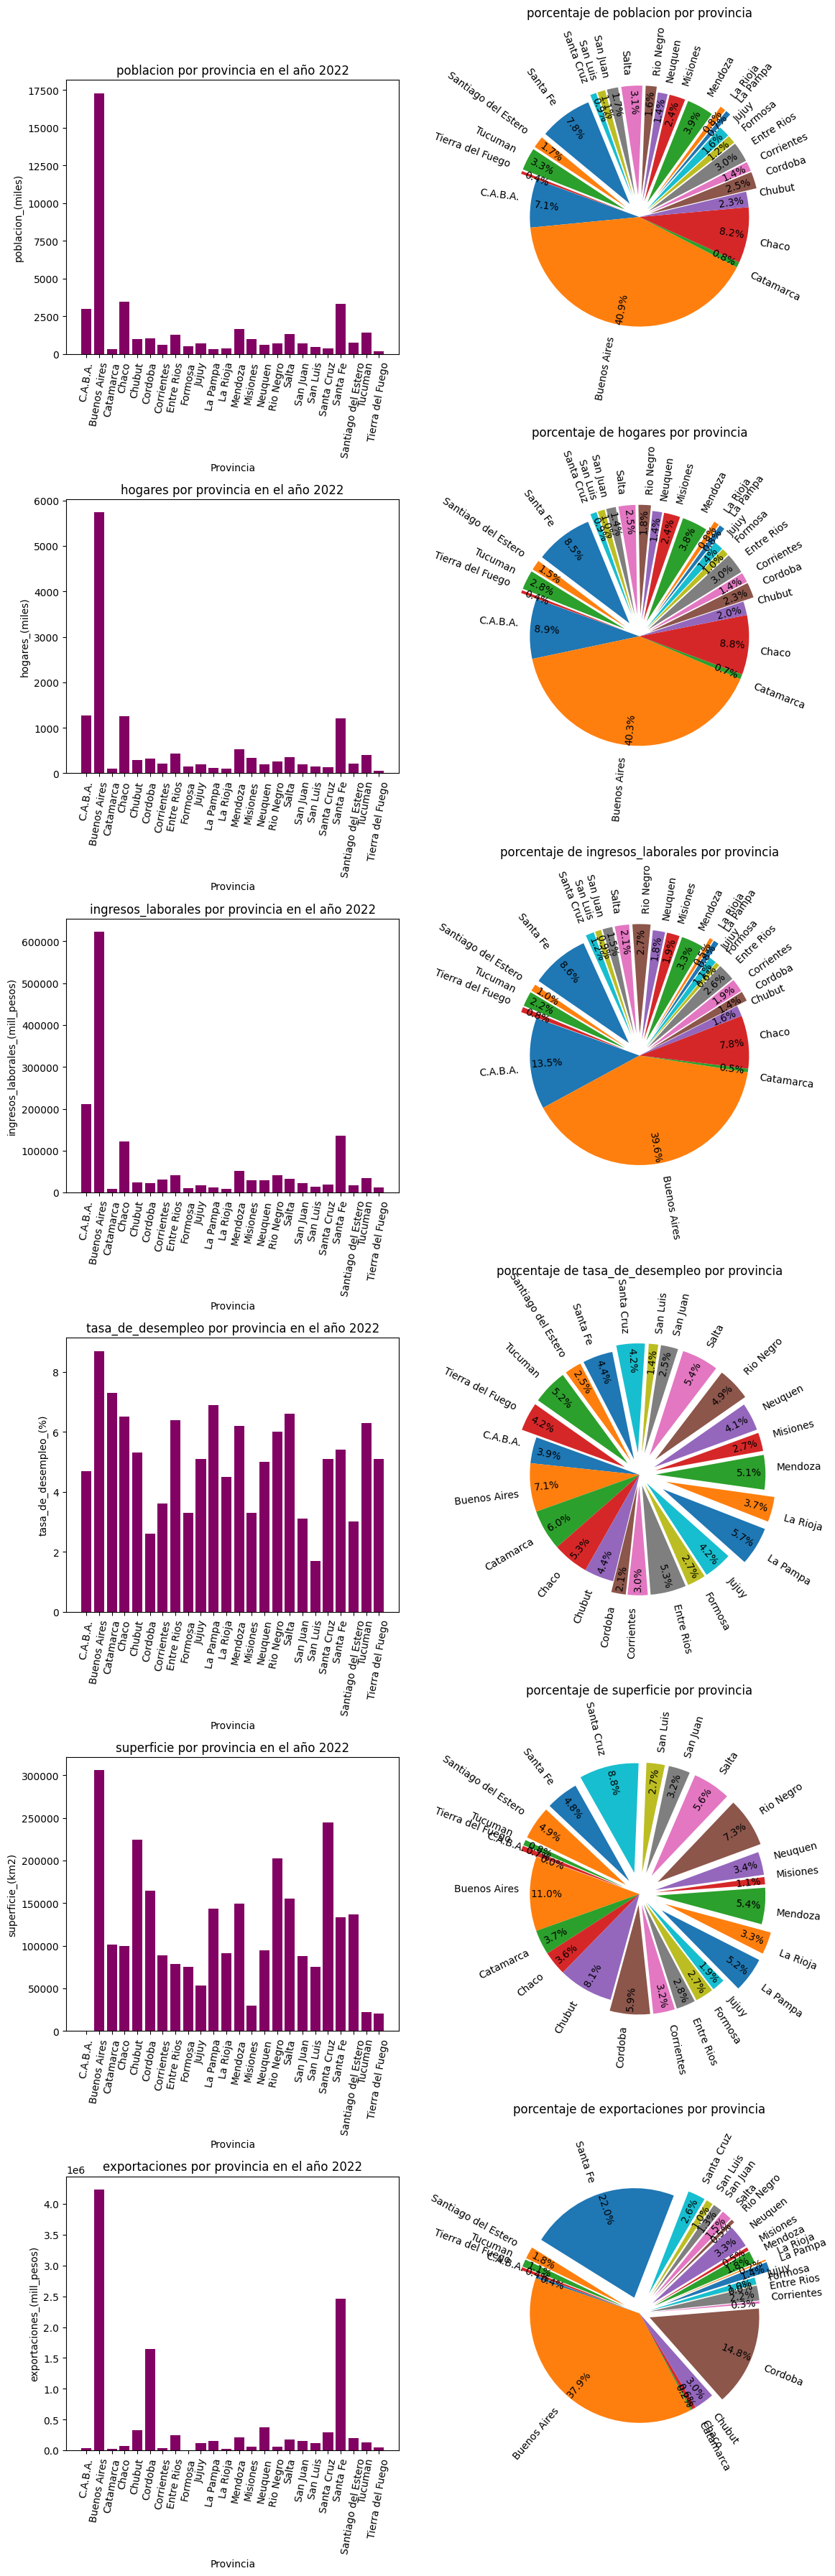

In [87]:
numeric_columns = provincias_datos_2022_df.select_dtypes(include=['int64', 'float64']).columns

# Configuración de subplots
num_rows = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6*num_rows))

# Graficar gráfico de barras y gráfico de tortas para cada columna
for i, column in enumerate(numeric_columns):
    start = column.find('(') + 1
    # Gráfico de barras
    ax1 = axes[i, 0]
    ax1.bar(provincias_datos_2022_df['provincia'].apply(lambda x : x.replace('Ciudad Autonoma de Buenos Aires', 'C.A.B.A.')), provincias_datos_2022_df[column], color= '#820263')
    ax1.set_xlabel('Provincia')
    ax1.set_ylabel(column)
    ax1.set_title(column[:start-2] + ' por provincia en el año 2022')
    ax1.tick_params(axis='x', rotation=80)

    # Gráfico de tortas
    explode = [0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.25, 0.25, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15]
    ax2 = axes[i, 1]
    wedges, labels, pc_texts = ax2.pie(provincias_datos_2022_df[column], labels=provincias_datos_2022_df['provincia'].apply(lambda x : x.replace('Ciudad Autonoma de Buenos Aires', 'C.A.B.A.')), radius= 1, autopct='%1.1f%%', startangle=160,rotatelabels= True, explode=explode, pctdistance=0.85)
    ax2.set_title('porcentaje de ' + column[:start-2] + ' por provincia', y=1.21)

    # Ajustar etiquetas de texto en el gráfico de tortas
    for label, pc_text in zip(labels, pc_texts):
      pc_text.set_rotation(label.get_rotation())  

plt.tight_layout()
plt.show()

Observaciones:

Se evidencia una clara predominancia de la provincia de Buenos Aires en todas las características evaluadas. Puede notarse observando la mangnitud de la barra que le corresponde. Además, observando el gráfico de torta se confirma que no solo su magnitud es grande, sino su influencia en el total en relación con las demás provincias.

Estos valores para la provincia de Buenos Aires, al encontrarse tan alejados de los de las demás provincias podrían considerarse como un dato a desconfiar puesto que es atípico en comparación con los demás. Al buscar e inspeccionar datos históricos de las variables evaluadas en fuentes oficiales (*) se comprende que a lo largo de los años, se ha cumplido la misma situación que la observada actualemente. Buenos Aires, históricamente ha sido la provincia que mayores nivles de exportación, ingresos laborales, población y cantidad de hogares presenta y con amplia diferencia.

La situación descrita, en la cual la provincia de Buenos Aires ha tenido los mayores niveles de población, cantidad de hogares, ingresos laborales y exportaciones, con una tasa de desempleo no mucho más alta que en otras provincias, puede deberse a varios factores:

Centralidad geográfica: Buenos Aires se encuentra muy cerca de la capital del país, la Ciudad Autónoma de Buenos Aires. La capital suele ser el centro de decisiones políticas, financieras y comerciales, lo que genera una mayor concentración de oportunidades laborales y empresariales. La proximidad a la capital puede brindar a una provincia acceso a un mayor flujo de inversiones, empresas y actividad económica. Su ubicación geográfica central, su cercanía al puerto que permite conexiones internacionales y su infraestructura han atraído a una gran cantidad de población, empresas y actividades económicas a lo largo de los años.

Concentración de recursos y oportunidades: La provincia de Buenos Aires cuenta con una amplia variedad de recursos naturales, así como con una diversidad de sectores económicos, incluyendo la industria manufacturera, servicios financieros, comercio y agricultura. Esta diversidad de sectores y recursos ha contribuido a la generación de empleo y al crecimiento económico en la provincia. Si bien, según datos observados de fuentes oficiales (*) el salario bruto mediano de la provincia de Buenos Aires no ha sido el más elevado a lo largo de los años, es la provincia con una considerable mayor cantidad de población, por lo que es lógico que la cantidad de ingresos laborales también sea la más alta. 

Instituciones y centros de educación: La provincia de Buenos Aires alberga numerosas instituciones educativas, universidades, centros de investigación y organismos gubernamentales. Esta concentración de instituciones educativas y de investigación puede atraer a estudiantes y profesionales de otras provincias, generando un mayor nivel de población y actividad económica.

(*)
Fuentes:

https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-2-79
Origen provincial de las exportaciones, por provincia y principales Grandes rubros, en millones de dólares. Años 1993-2022. Archivo: Principales_indicadores_INDEC.xlsx

https://datos.gob.ar/dataset/produccion-salarios-promedio-mediano-por-provincia-sector-actividad/archivo/produccion_45c7d4e8-8439-48f7-b222-ab99f3c5c2d6 Salario mediano por provincia, sector privado. Salario bruto mediano de los asalariados registrados del sector privado, por provincia, con frecuencia mensual y desde 2007 hasta 2022.

https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-135 Censo 1991, 2001, 2010


Se presentarán nuevamente los gráficos anteriores sin la provincia de Buenos Aires para poder tener una mejor apreciación de los niveles medidos para las demás provincias.

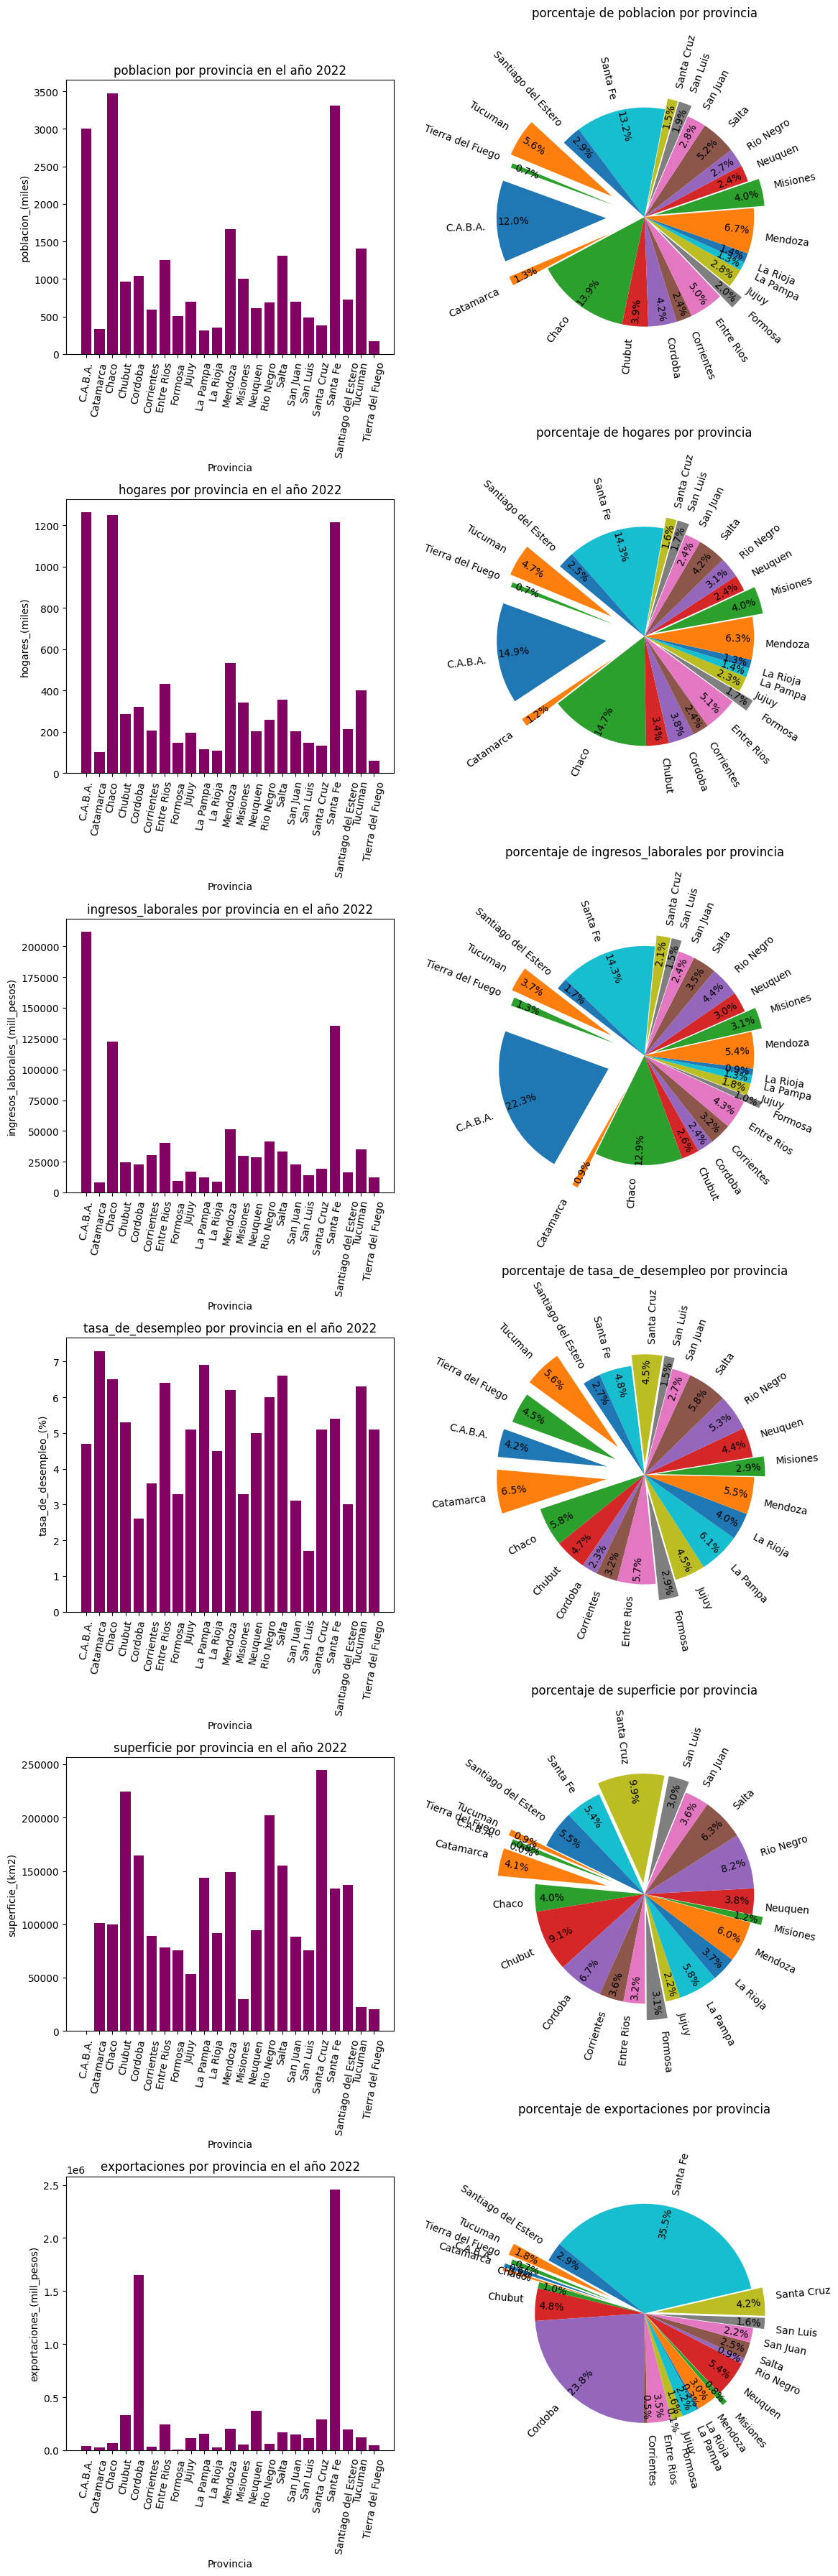

In [88]:
numeric_columns = provincias_datos_2022_df[provincias_datos_2022_df['provincia'] != 'Buenos Aires'].reset_index(drop= True).select_dtypes(include=['int64', 'float64']).columns

# Configuración de subplots
num_rows = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6*num_rows))

# Graficar gráfico de barras y gráfico de tortas para cada columna
for i, column in enumerate(numeric_columns):
    start = column.find('(') + 1
    # Gráfico de barras
    ax1 = axes[i, 0]
    ax1.bar(provincias_datos_2022_df[provincias_datos_2022_df['provincia'] != 'Buenos Aires'].reset_index(drop= True)['provincia'].apply(lambda x : x.replace('Ciudad Autonoma de Buenos Aires', 'C.A.B.A.')), provincias_datos_2022_df[provincias_datos_2022_df['provincia'] != 'Buenos Aires'].reset_index(drop= True)[column], color= '#820263')
    ax1.set_xlabel('Provincia')
    ax1.set_ylabel(column)
    ax1.set_title(column[:start-2] + ' por provincia en el año 2022')
    ax1.tick_params(axis='x', rotation=80)

    # Gráfico de tortas
    explode = [0.35, 0.35, 0.0, 0, 0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.35, 0.30]
    ax2 = axes[i, 1]
    wedges, labels, pc_texts = ax2.pie(provincias_datos_2022_df[provincias_datos_2022_df['provincia'] != 'Buenos Aires'].reset_index(drop= True)[column], labels=provincias_datos_2022_df[provincias_datos_2022_df['provincia'] != 'Buenos Aires'].reset_index(drop= True)['provincia'].apply(lambda x : x.replace('Ciudad Autonoma de Buenos Aires', 'C.A.B.A.')), radius= 1, autopct='%1.1f%%', startangle=160,rotatelabels= True, explode=explode, pctdistance=0.85)
    ax2.set_title('porcentaje de ' + column[:start-2] + ' por provincia', y=1.21)

    # Ajustar etiquetas de texto en el gráfico de tortas
    for label, pc_text in zip(labels, pc_texts):
      pc_text.set_rotation(label.get_rotation())  

plt.tight_layout()
plt.show()

Observaciones:

La capital del país, Ciudad Autónoma de Buenos Aires (C.A.B.A.) tiene grandes niveles de población, cantidad de hogares e ingresos laborales en comparación con las demás provincias, considerando que su superficie es muchísimo menor (205.9 km2) al de la provincia con el menor valor en extensión territorial (20698.3 km2). Tanto menor es que no se observa una barra en el gráfico de superficie y su contribución en el de torta es del 0%.
No presenta un alto valor ni proporción de exportaciones. Podría parecer contradictorio dados los altos valores en otras variables. Sin embargo, en Argentina las exportaciones son principalmente de industrias de cereales, material de transporte terrestre, metales comunes y sus manufacturas, grasas y aceites. Considerando que la superficie de la capital es pequeña como para albergar gran cantidad de dichas industrias, se comprende que su nivel de exportación no sea elevado. Los ingresos laborales altos se explican más por su cantidad de población y pueden provenir de otros sectores que aportan a la economía, por ejemplo, el turismo.

Aún así, los elevados valores que presenta en el resto de las medidas se comprenden porque justamente es la capital del país. Como se comentó anteriormente, la capital suele ser el centro de decisiones políticas, financieras y comerciales, lo que genera una mayor concentración de oportunidades laborales y empresariales. La diversidad de opciones de empleo y la presencia de empresas de alto perfil pueden generar mayores ingresos laborales y una mayor atracción para la población en busca de trabajo.

Otro aspecto a notar es que la porción del gráfico de tortas y el alto de las barras suele distribuirse de manera muy similar en todos los gráficos (excepto en el de tasa de desempleo donde hay mucha similaridad entre las barras y la porción del gráfico de tortas para cada provincia). Es decir, en general, cuando la cantidad de población y de hogares se observan en niveles bajos, los ingresos laborales y las exportaciones también presentan niveles bajos para la respectiva provincia y viceversa. Esto no se cumple para los gráficos de superficie puesto que dicha variable es un valor fijo establecido para separar políticamente al país y no es influenciada por otras variables.

Puede notarse que las provincias que poseen mayor contribución a las variables analizadas, además de Buenos Aires y la Capital, son Santa Fe, Córdoba, Mendoza y Chaco.
Llama la atención que dados los elevados niveles en cantidad de población, hogares e ingresos laborales de Chaco, posea un valor tan bajo en exportaciones. A su vez, Córdoba presenta un nivel de exportaciones elevado teniendo una cantidad de población, hogares e ingresos laborales bajos en comparación con otras provincias. Ambas provincias se separan en comportamiento del patrón observado para el resto de las provincias.


---
#### 2-3.2.3 - Gráfico de matriz de correlación

Teniendo en cuenta el patrón observado de que, en general, las provincias con altos valores de población y cantidad de hogares también poseen elevados ingresos laborales y exportaciones, a continuación se realizará el gráfico de la matriz de correlación para las variables con el fin de examinar el nivel de asociación lineal entre las mismas.

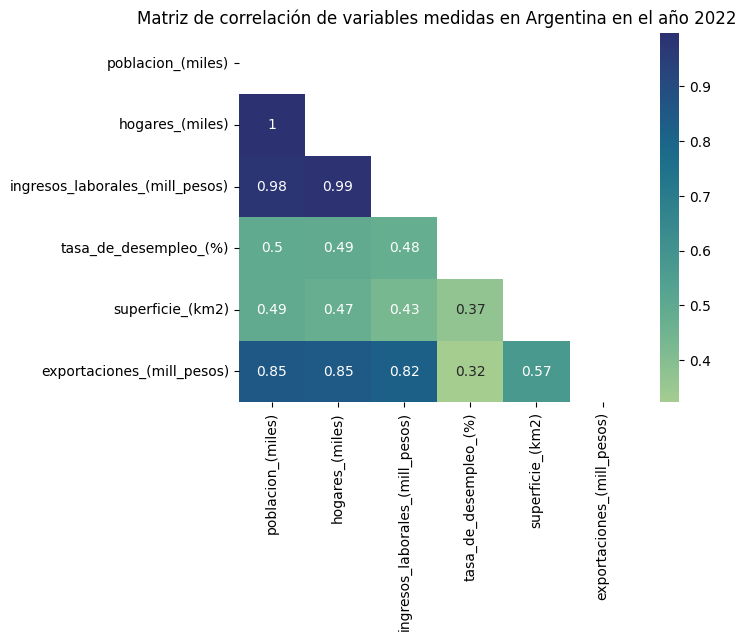

In [89]:
# Obtener la matriz de correlación
correlation_matrix = provincias_datos_2022_df[['poblacion_(miles)', 'hogares_(miles)', 'ingresos_laborales_(mill_pesos)', 'tasa_de_desempleo_(%)', 'superficie_(km2)', 'exportaciones_(mill_pesos)']].corr()

# Obtener la matriz triangular inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el gráfico de heatmap
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap= 'crest')

# Configurar título gráfico
plt.title("Matriz de correlación de variables medidas en Argentina en el año 2022")

# Mostrar el gráfico
plt.show()

Observaciones:

Se encuentra que existe una fuerte correlación positiva entre varias variables. 

La correlación entre población y hogares se registra de 1. Un valor de 1 positivo indica una correlación lineal positiva perfecta entre las variables. Esto significa que cuando la población aumenta, la cantidad de hogares también lo hace de manera proporcional. 
Este tipo de correlación puede deberse a factores tales como el creciemiento demógráfico y la urbanización. Si la población de una provincia aumenta, es probable que se necesiten más hogares para albergar a esa población adicional. Esto puede ser el resultado de un aumento natural de la población debido a tasas de natalidad más altas, migración hacia esa provincia, entre otros factores. Si las áreas urbanas de una provincia están experimentando un crecimiento significativo, es probable que esto conduzca a un mayor número de hogares. 
Sin embargo, en la mayoría de los casos, una correlación lineal positiva perfecta entre la población y la cantidad de hogares es poco probable en situaciones del mundo real.

La correlación hallada entre exportaciones e ingresos, ingresos y cantidad de población/hogares, exportaciones y cantidad de población/hogares es considerablemente alta, cercana a 1 positivo. Es decir que existe una fuerte correlación entre ellas. Estos valores representan una relación en la que los cambios en una variable tienden a estar asociados con cambios en la otra variable, pero no de manera perfecta. En los gráficos y evaluaciones previas realizadas se pudo observar que exiten provincias donde esta fuerte asociación encontrada entre algunas variables no es el patrón al que responden, por lo que, es lógico que no alcancen el 1, dándose una situación más realista. Teniendo conocimiento de estas fuertes correlaciones, se vuelve sobre el ejemplo de la provincia de Buenos Aires en los primeros gráficos de barra y torta. Allí se ve reflejado lo mostrado por la matriz de correlación puesto que si es muy elevado el valor de población/ cantidad de hogares, también lo son los de ingresos laborales y exportaciones. Las demás provincias, en general, también responden así, aunque teniendo valores más chicos en las variables.  

La tasa de desempleo y la superficie tienen una correlación positiva alrededor del 0.5 o 0.3 con las demás variables. Indica una relación moderada a baja entre ellas. Esto significa que existe una cierta tendencia de que a medida que una variable aumenta, la otra variable también tienda a aumentar, aunque dicha tendencia no es significativa ni mucho menos perfectamente proporcional.

---
#### 2-3.2.4 - Mapa: Los datos geoespaciales permiten utilizar mapas para visualizar estos datos. Se pueden colorear las provincias según el valor de una variable, como la tasa de desempleo o las exportaciones, lo que permitirá identificar patrones geográficos y diferencias entre regiones.

Fuente de datos geoespaciales: Instituto Geográfico Nacional https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG 

Se verá a continuación la representación visual de los valores de cada columna en el mapa de la República Argentina.

Se elije ésta como una forma de visualizar los datos porque permite asociar más fácil y rápidamente cómo se distribuyen los valores en el suelo argentino. Se usa como complemento de los demás gráficos usados hasta el momento para explorar y entender mejor los datos desde el punto de vista geográfico.

In [90]:
# Carga de dataframe auxiliar e inspección del mismo
provincias_shapefile = "./provincia.shp"
provincias_mapa = gpd.read_file(provincias_shapefile)
provincias_mapa.head()

,gid,entidad,fna,gna,nam,in1,fdc,sag,fdc2,geometry
0,1,0.0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,02,IGN,IGN,NaN,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,2,0.0,Provincia del Neuquén,Provincia,Neuquén,58,IGN,IGN,NaN,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."
2,3,0.0,Provincia de San Luis,Provincia,San Luis,74,IGN,IGN,NaN,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8..."
3,4,0.0,Provincia de Santa Fe,Provincia,Santa Fe,82,IGN,IGN,NaN,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9..."
4,11,0.0,Provincia del Chubut,Provincia,Chubut,26,IGN,IGN,NaN,"MULTIPOLYGON (((-66.69852 -45.24747, -66.69920..."


Se acondicionan el header, el orden de las filas y algunos valores presentes en el dataframe provincias_shapefile para poder utilizarlo en combinación con el de provincias_datos_2022_df

In [91]:
provincias_mapa = provincias_mapa.rename(columns={"nam": "provincia"})

In [92]:
provincias_mapa.sort_values(by=['provincia'], inplace=True)

In [93]:
provincias_mapa['provincia'] = provincias_mapa['provincia'].apply(eliminar_acentos)

In [94]:
provincias_mapa['provincia'][6] = 'Entre Rios'
provincias_mapa['provincia'][15] = 'Tierra del Fuego'

<ipython-input-94-0bf142cfb439>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincias_mapa['provincia'][6] = 'Entre Rios'
<ipython-input-94-0bf142cfb439>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincias_mapa['provincia'][15] = 'Tierra del Fuego'


In [95]:
provincias_mapa

,gid,entidad,fna,gna,provincia,in1,fdc,sag,fdc2,geometry
16,23,0.0,Provincia de Buenos Aires,Provincia,Buenos Aires,06,IGN,IGN,NaN,"MULTIPOLYGON (((-62.15339 -40.45148, -62.15339..."
19,6,0.0,Provincia de Catamarca,Provincia,Catamarca,10,IGN,IGN,NaN,"POLYGON ((-68.50537 -25.16851, -68.50386 -25.1..."
21,8,0.0,Provincia del Chaco,Provincia,Chaco,22,IGN,IGN,NaN,"POLYGON ((-62.32434 -24.12318, -62.31959 -24.1..."
4,11,0.0,Provincia del Chubut,Provincia,Chubut,26,IGN,IGN,NaN,"MULTIPOLYGON (((-66.69852 -45.24747, -66.69920..."
0,1,0.0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autonoma de Buenos Aires,02,IGN,IGN,NaN,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
11,18,0.0,Provincia de Corrientes,Provincia,Corrientes,18,IGN,IGN,NaN,"MULTIPOLYGON (((-56.86162 -27.59213, -56.86047..."
14,21,0.0,Provincia de Córdoba,Provincia,Cordoba,14,IGN,IGN,NaN,"POLYGON ((-63.89431 -29.62860, -63.87386 -29.6..."
6,13,0.0,Provincia de Entre Ríos,Provincia,Entre Rios,30,IGN,IGN,NaN,"POLYGON ((-58.58534 -30.15902, -58.58449 -30.1..."
22,9,0.0,Provincia de Formosa,Provincia,Formosa,34,IGN,IGN,NaN,"POLYGON ((-62.31201 -22.48666, -62.31056 -22.4..."
8,15,0.0,Provincia de Jujuy,Provincia,Jujuy,38,IGN,IGN,NaN,"POLYGON ((-66.20766 -21.78835, -66.19414 -21.7..."


Se realiza la combinación de los dataframes para obtener uno a partir del cual se graficarán los mapas

In [96]:
provincias_mapa = provincias_mapa.merge(provincias_datos_2022_df, on='provincia')

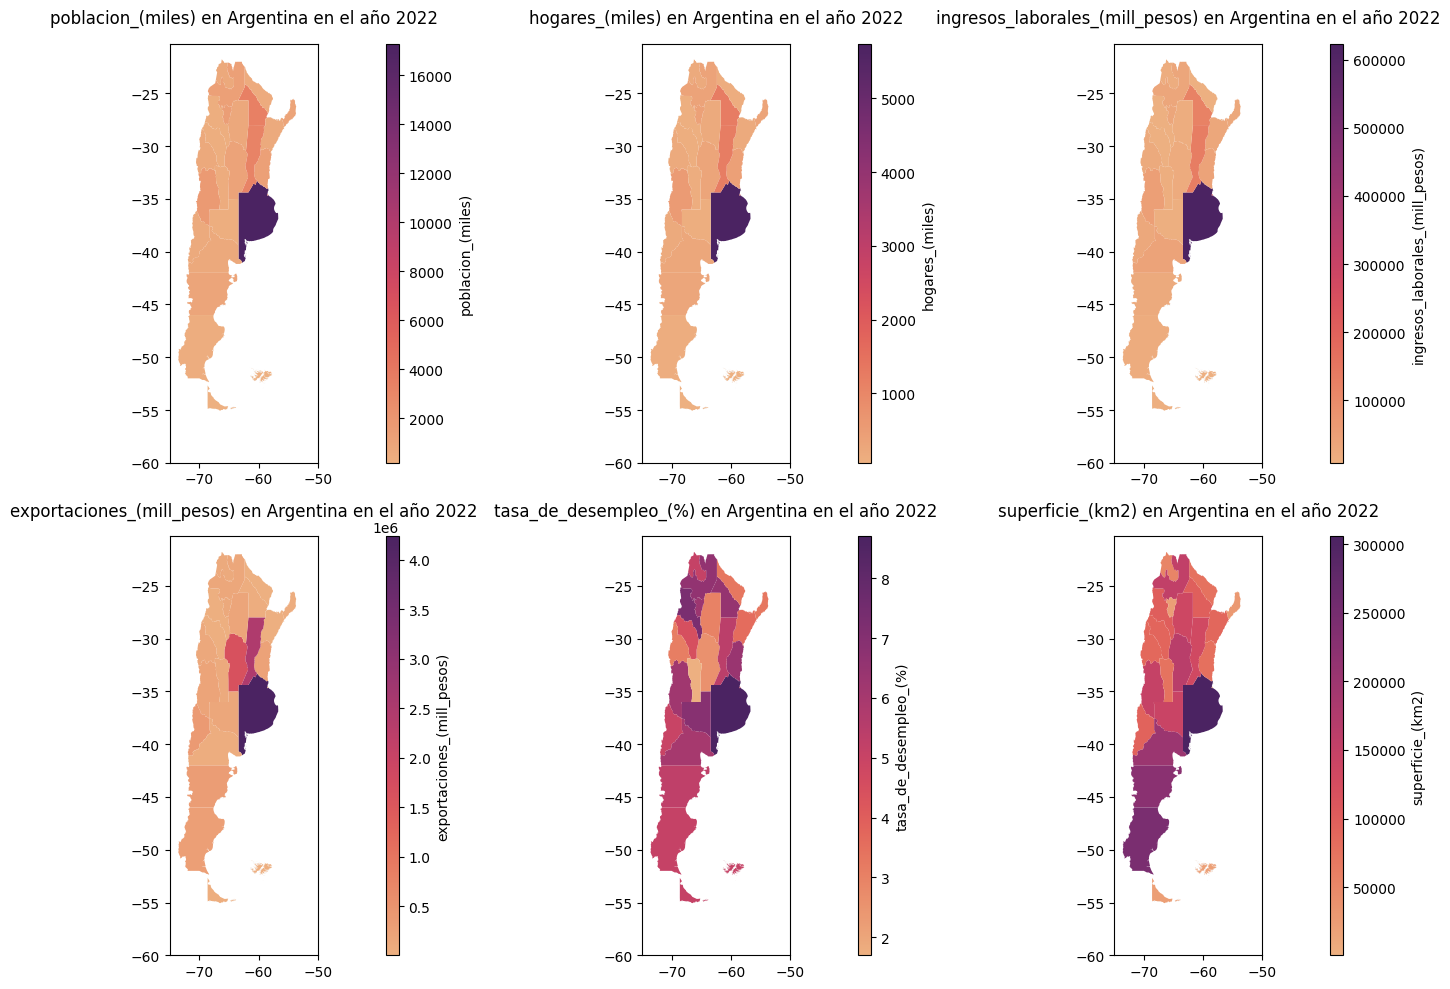

In [97]:
variables = ['poblacion_(miles)', 'hogares_(miles)', 'ingresos_laborales_(mill_pesos)', 'exportaciones_(mill_pesos)', 'tasa_de_desempleo_(%)', 'superficie_(km2)']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, variable in enumerate(variables):
    ax = axes[i]
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    provincias_mapa.plot(
        column=variable,
        cmap='flare',
        ax=ax,
        legend=True,
        cax=cax,
        legend_kwds={"label": variable, "orientation": "vertical"}
    )
    ax.set_title(variable + ' en Argentina en el año 2022', pad=15)
    ax.set_ylim(-60, -20.3)
    ax.set_xlim(-75, -50)

plt.tight_layout()
plt.show()

Se realiza un acercamiento a la Ciudad Autónoma de Buenos Aires ya que es complicado divisarla en el anterior mapa

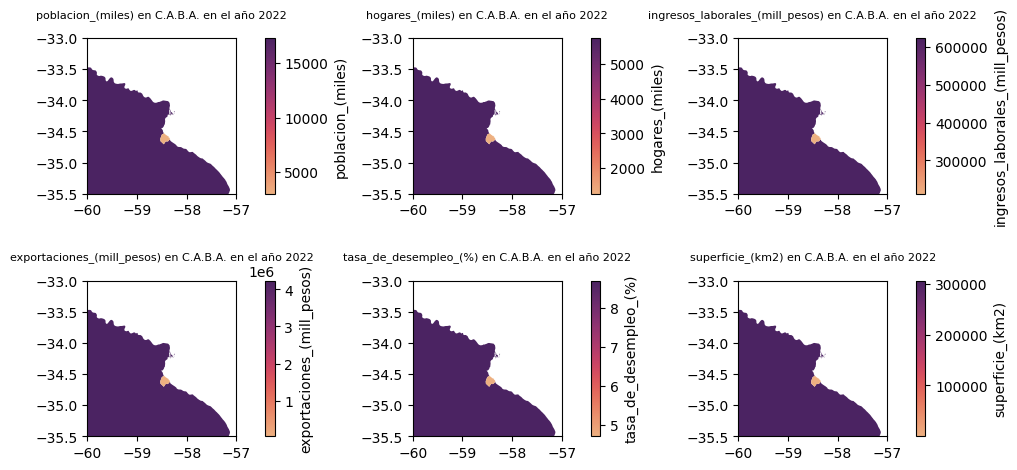

In [98]:
variables = ['poblacion_(miles)', 'hogares_(miles)', 'ingresos_laborales_(mill_pesos)', 'exportaciones_(mill_pesos)', 'tasa_de_desempleo_(%)', 'superficie_(km2)']

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.ravel()

for i, variable in enumerate(variables):
    ax = axes[i]
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    provincias_mapa[provincias_mapa['provincia'].isin(['Ciudad Autonoma de Buenos Aires', 'Buenos Aires'])].plot(
        column=variable,
        cmap='flare',
        ax=ax,
        legend=True,
        cax=cax,
        legend_kwds={"label": variable, "orientation": "vertical"}
    )
    ax.set_title(variable + ' en C.A.B.A. en el año 2022', pad=15, fontsize=8)
    ax.set_ylim(-35.5, -33)
    ax.set_xlim(-60, -57)

plt.tight_layout()
plt.show()

Observaciones:

En provincias pertenecientes a regiones de la Pampa y el Litoral es dónde se registran los mayores niveles de población, hogares, ingresos laborales y exportaciones. La tasa de desempleo, si bien no tiene una clara concentración de valores altos o bajos por región del país, también es de los valores más elevados en las provincias pertenecientes a estas regiones.

---
### 2-3.3 - Conclusiones

Dadas las observaciones realizadas, se pueden extraer las siguientes conclusiones y reflexiones:

Buenos Aires: La provincia de Buenos Aires destaca en todas las variables evaluadas, mostrando una clara predominancia en términos de población, cantidad de hogares, ingresos laborales y exportaciones. Su influencia es significativa en comparación con el resto de las provincias.

Ciudad Autónoma de Buenos Aires (C.A.B.A.): A pesar de su pequeña superficie, C.A.B.A. muestra altos niveles de población, cantidad de hogares e ingresos laborales. Esto indica una concentración de actividad económica y poblacional en la capital del país.

Relación entre variables: Se observa una fuerte correlación entre las variables de exportaciones, ingresos laborales y cantidad de población/hogares. Estas variables están estrechamente relacionadas y su comportamiento tiende a ser similar. Por otro lado, la tasa de desempleo y la superficie muestran una correlación moderada con las demás variables, lo que indica una relación menos directa pero aún presente.

Provincias destacadas: Además de Buenos Aires y C.A.B.A., las provincias de Santa Fe, Córdoba, Mendoza y Chaco también tienen una contribución significativa en las variables analizadas.

Regiones y características: Se observa que las provincias ubicadas en las regiones de la Pampa y el Litoral son las que registran los mayores valores en población, hogares, ingresos laborales y exportaciones. Estas regiones tienen una concentración de actividad económica y poblacional.

En general, las observaciones revelan patrones de desigualdad y concentración en términos de población y actividad económica. La provincia de Buenos Aires destaca claramente en todas las variables, seguida por otras provincias relevantes.

---
## 4 - Escribir el informe incluyendo código Python utilizado, las visualizaciones y las conclusiones en un cuaderno Google Colab. El dataframe final curado debe ser exportado a formato .parquet.


In [99]:
# Dataframe a exportar en formato parquet
provincias_datos_2022_df

,provincia,poblacion_(miles),hogares_(miles),ingresos_laborales_(mill_pesos),tasa_de_desempleo_(%),superficie_(km2),exportaciones_(mill_pesos)
0,Ciudad Autonoma de Buenos Aires,3004,1263,211877.384,4.7,205.9,3.990665e+04
1,Buenos Aires,17292,5738,623250.917,8.7,305907.4,4.235412e+06
2,Catamarca,336,102,8460.986,7.3,101486.1,2.578210e+04
3,Chaco,3477,1251,122790.341,6.5,99763.3,6.622009e+04
4,Chubut,967,287,24733.558,5.3,224302.3,3.302915e+05
5,Cordoba,1044,321,22744.468,2.6,164707.8,1.648266e+06
6,Corrientes,591,205,30606.036,3.6,89123.3,3.503598e+04
7,Entre Rios,1252,431,40510.249,6.4,78383.7,2.452014e+05
8,Formosa,509,148,9586.123,3.3,75488.3,5.208745e+03
9,Jujuy,696,197,17044.750,5.1,53244.2,1.120187e+05


In [100]:
# Se utiliza pyarrow para escribir los datos en un archivo Parquet
tabla = pa.Table.from_pandas(provincias_datos_2022_df)
pq.write_table(tabla, 'provincias_datos_2022.parquet')
print(pd.read_parquet('provincias_datos_2022.parquet'))

                          provincia  poblacion_(miles)  hogares_(miles)  \
0   Ciudad Autonoma de Buenos Aires               3004             1263   
1                      Buenos Aires              17292             5738   
2                         Catamarca                336              102   
3                             Chaco               3477             1251   
4                            Chubut                967              287   
5                           Cordoba               1044              321   
6                        Corrientes                591              205   
7                        Entre Rios               1252              431   
8                           Formosa                509              148   
9                             Jujuy                696              197   
10                         La Pampa                317              116   
11                         La Rioja                356              108   
12                       